#Data Understanding (Exploratory Data Analysis)

In [1]:
pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel('/content/online_retail_II.xlsx')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape

(525461, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


#Checking Missing Values

In [6]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [7]:
df.isnull().mean()*100

,0
Invoice,0.000000
StockCode,0.000000
Description,0.557225
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,20.539488
Country,0.000000


#Descriptive Statistics

In [8]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


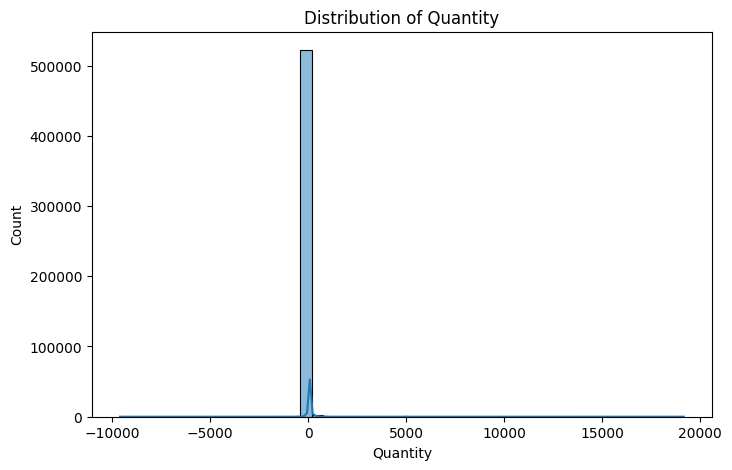

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()

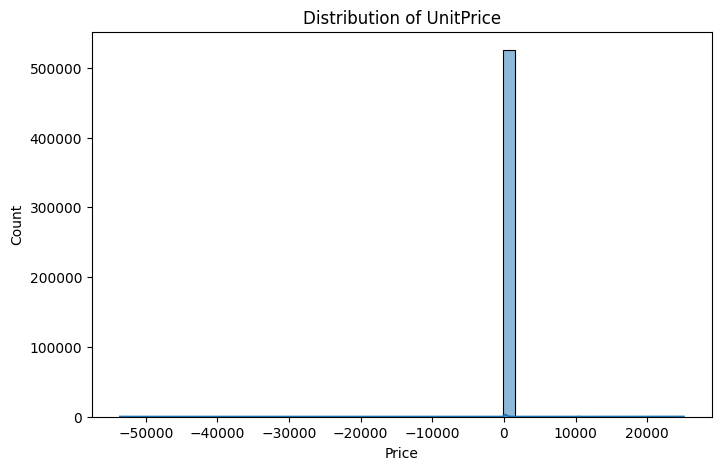

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.show()

In [11]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the minimum and maximum transaction dates
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

print("Date Range: ", min_date, " to ", max_date)

Date Range:  2009-12-01 07:45:00  to  2010-12-09 20:01:00


In [12]:
# Top 10 customers by number of transactions
top_customers = df['Customer ID'].value_counts().head(10)
print("Top 10 Customers by Number of Transactions:\n", top_customers)

Top 10 Customers by Number of Transactions:
 Customer ID
14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
17850.0    2515
16549.0    2274
15311.0    2226
14527.0    1826
14646.0    1805
Name: count, dtype: int64


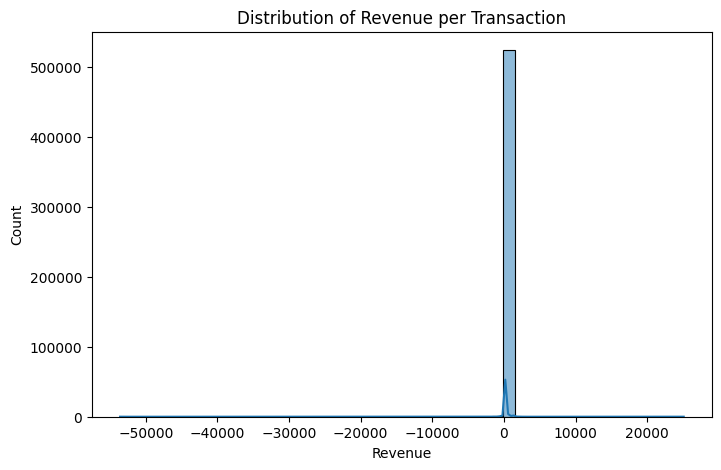

In [13]:
# Calculate Revenue for each transaction
df['Revenue'] = df['Quantity'] * df['Price']

# Distribution of Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['Revenue'], bins=50, kde=True)
plt.title('Distribution of Revenue per Transaction')
plt.show()

#Data Preparation

In [14]:
# Drop rows where CustomerID is missing (as we need this information for CLV)
df = df.dropna(subset=['Customer ID'])

# Check if there are any more missing values in important columns
missing_values_after = df.isnull().sum()
print("Missing Values After Dropping Customer ID Nulls:\n", missing_values_after)

Missing Values After Dropping Customer ID Nulls:
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
dtype: int64


In [15]:
 # Filter out rows with negative or zero quantity
df = df[df['Quantity'] > 0]

In [16]:
reference_date=df['InvoiceDate'].max()
print(reference_date)

2010-12-09 20:01:00


In [17]:
rfm=df.groupby('Customer ID').agg({'InvoiceDate': lambda x:(reference_date-x.max()).days,
                                   'Invoice' : 'count',
                                   'Revenue' : 'sum'}).reset_index()
print(rfm)

      Customer ID  InvoiceDate  Invoice  Revenue
0         12346.0          164       33   372.86
1         12347.0            2       71  1323.32
2         12348.0           73       20   222.16
3         12349.0           42      102  2671.14
4         12351.0           10       21   300.93
...           ...          ...      ...      ...
4309      18283.0           17      230   641.77
4310      18284.0           66       28   461.68
4311      18285.0          295       12   427.00
4312      18286.0          111       67  1296.43
4313      18287.0           17       85  2345.71

[4314 rows x 4 columns]


In [18]:
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
print(rfm)

      Customer ID  Recency  Frequency  Monetary
0         12346.0      164         33    372.86
1         12347.0        2         71   1323.32
2         12348.0       73         20    222.16
3         12349.0       42        102   2671.14
4         12351.0       10         21    300.93
...           ...      ...        ...       ...
4309      18283.0       17        230    641.77
4310      18284.0       66         28    461.68
4311      18285.0      295         12    427.00
4312      18286.0      111         67   1296.43
4313      18287.0       17         85   2345.71

[4314 rows x 4 columns]


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

rfm_scaled_df=pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df['Customer ID'] = rfm['Customer ID']

print(rfm_scaled_df.head())

    Recency  Frequency  Monetary  Customer ID
0  0.760643  -0.304486 -0.187895      12346.0
1 -0.910627  -0.116364 -0.081240      12347.0
2 -0.178157  -0.368843 -0.204806      12348.0
3 -0.497968   0.037104  0.070005      12349.0
4 -0.828095  -0.363893 -0.195967      12351.0


#Modeling

In [20]:
from sklearn.model_selection import train_test_split
X=rfm_scaled_df[['Recency','Frequency','Monetary']]
y=rfm_scaled_df['Monetary']

In [21]:
X_train,X_test, Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [22]:
X_train.shape

(3451, 3)

In [23]:
X_test.shape

(863, 3)

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

print(model.coef_)

[-3.24094935e-16  6.10622664e-16  1.00000000e+00]


In [25]:
y_pred=model.predict(X_test)
print("First 10 Predictions:", y_pred[:10])

First 10 Predictions: [-0.06537163  0.36043482 -0.13224821 -0.19703872  0.93690406 -0.18937334
 -0.15587838 -0.19647989 -0.21451953 -0.19681766]


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 4.151276320612269e-16
Root Mean Squared Error (RMSE): 8.327718653665499e-16


In [27]:
import numpy as np

# Apply log-transform to the target variable (adding 1 to avoid log(0))
Y_train_log = np.log1p(Y_train)
Y_test_log = np.log1p(Y_test)

# Train the linear regression model on the log-transformed target
model_log = LinearRegression()
model_log.fit(X_train, Y_train_log)

# Make predictions on the test set (log scale)
y_pred_log = model_log.predict(X_test)

# Convert the predictions back to the original scale by exponentiating
y_pred_exp = np.expm1(y_pred_log)

# Set any negative predictions to zero (since CLV cannot be negative)
y_pred_exp[y_pred_exp < 0] = 0

# Display the first 10 improved predictions
print("First 10 Improved Predictions:", y_pred_exp[:10])

First 10 Improved Predictions: [0.         0.09484374 0.         0.         0.04820721 0.
 0.         0.         0.         0.        ]


In [28]:
# Calculate MAE and RMSE for the improved model
mae_improved = mean_absolute_error(Y_test, y_pred_exp)
rmse_improved = np.sqrt(mean_squared_error(Y_test, y_pred_exp))

print(f"Improved Mean Absolute Error (MAE): {mae_improved}")
print(f"Improved Root Mean Squared Error (RMSE): {rmse_improved}")

Improved Mean Absolute Error (MAE): 4.2261279841280555
Improved Root Mean Squared Error (RMSE): 110.14769423470744


In [29]:
# Create new features for customer behavior
# Customer Tenure: Days between first and last purchase
df['Tenure'] = (df.groupby('Customer ID')['InvoiceDate'].transform('max') -
                df.groupby('Customer ID')['InvoiceDate'].transform('min')).dt.days

# Average Order Value per customer
df['AvgOrderValue'] = df.groupby('Customer ID')['Revenue'].transform('mean')

# Update RFM DataFrame with new features
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'count',  # Frequency
    'Revenue': 'sum',  # Monetary value
    'Tenure': 'mean',  # Customer Tenure
    'AvgOrderValue': 'mean'  # Avg order value
}).reset_index()

# Rename columns for clarity
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Tenure', 'AvgOrderValue']

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Define the feature matrix (X) and the target variable (y)
X = rfm[['Recency', 'Frequency', 'Monetary', 'Tenure', 'AvgOrderValue']]
y = np.log1p(rfm['Monetary'])  # Log-transform target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Convert predictions back to original scale
y_pred_rf_exp = np.expm1(y_pred_rf)

# Set any negative predictions to zero
y_pred_rf_exp[y_pred_rf_exp < 0] = 0

# Display the first 10 improved predictions
print("First 10 Predictions with Random Forest:", y_pred_rf_exp[:10])

First 10 Predictions with Random Forest: [ 902.28495287  437.28875809 2243.12485867  698.78138532  331.89949066
  275.63544792  326.82993127 5274.69749091  503.33260468 6621.76748305]


In [31]:
# Calculate MAE and RMSE for Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf_exp)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_exp))

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")

Random Forest Mean Absolute Error (MAE): 2534.196679356731
Random Forest Root Mean Squared Error (RMSE): 9896.885278292391


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


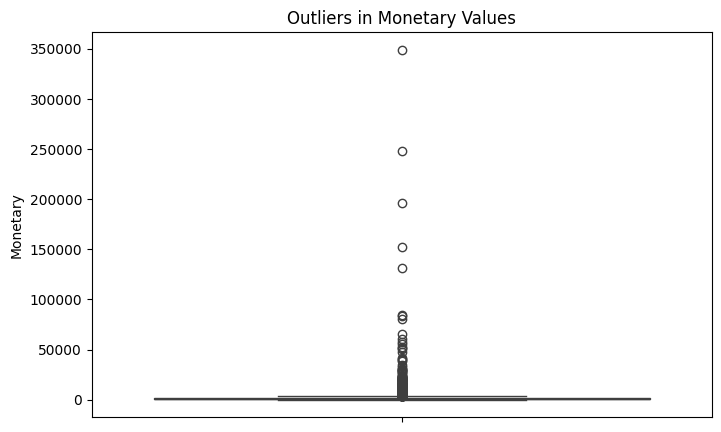

In [32]:
# Check for outliers in Monetary values
plt.figure(figsize=(8, 5))
sns.boxplot(rfm['Monetary'])
plt.title('Outliers in Monetary Values')
plt.show()

# You can filter or cap extreme outliers in the data

In [33]:
# Use a subset of the data for faster tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Perform the grid search or randomized search on the sample

In [34]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Limit the number of iterations
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model on the subset of training data
random_search.fit(X_train_sample, y_train_sample)

# Get the best parameters
print("Best Parameters from Randomized Search:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}


In [35]:
# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model on the full training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_best = best_rf_model.predict(X_test)

# Convert predictions back to original scale by exponentiating
y_pred_rf_best_exp = np.expm1(y_pred_rf_best)

# Set any negative predictions to zero (since CLV cannot be negative)
y_pred_rf_best_exp[y_pred_rf_best_exp < 0] = 0

# Display the first 10 improved predictions
print("First 10 Predictions with Optimized Random Forest:", y_pred_rf_best_exp[:10])

First 10 Predictions with Optimized Random Forest: [ 902.2615855   437.30314449 2243.33178743  698.17525888  331.82311755
  275.67123283  326.79485695 5274.35930781  503.19024429 6621.26453692]


In [36]:
# Calculate MAE and RMSE for the tuned Random Forest model
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best_exp)
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_rf_best_exp))

print(f"Tuned Random Forest MAE: {mae_rf_best}")
print(f"Tuned Random Forest RMSE: {rmse_rf_best}")

Tuned Random Forest MAE: 2548.2872039495055
Tuned Random Forest RMSE: 10039.06193176001


In [37]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the feature matrix (X) and the target variable (y)
X = rfm[['Recency', 'Frequency', 'Monetary', 'Tenure', 'AvgOrderValue']]
y = np.log1p(rfm['Monetary'])  # Log-transform target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))

# Hidden layers (you can experiment with the number of layers and neurons)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Output layer (since it's a regression problem, no activation function)
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Check the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 29.2126 - mean_absolute_error: 5.0400 - val_loss: 9.4509 - val_mean_absolute_error: 2.1849
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.3658 - mean_absolute_error: 1.8524 - val_loss: 4.7710 - val_mean_absolute_error: 1.3552
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4410 - mean_absolute_error: 1.3227 - val_loss: 3.3785 - val_mean_absolute_error: 1.2005
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8820 - mean_absolute_error: 1.1748 - val_loss: 2.5474 - val_mean_absolute_error: 1.0654
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5072 - mean_absolute_error: 1.0398 - val_loss: 1.8864 - val_mean_absolute_error: 0.9363
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6352 - mean_absolute_error: 0.9029 - val_loss: 1.4388 - val_mean_absolute_error: 0.8162
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1394 - mean_absolute_error: 0.7826 - val_los

In [40]:
# Make predictions on the test set
y_pred_nn = model.predict(X_test_scaled)

# Convert predictions back to original scale (since we log-transformed the target)
y_pred_nn_exp = np.expm1(y_pred_nn)

# Set any negative predictions to zero
y_pred_nn_exp[y_pred_nn_exp < 0] = 0

# Evaluate the performance of the model
mae_nn = mean_absolute_error(y_test, y_pred_nn_exp)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn_exp))

print(f"Neural Network Mean Absolute Error (MAE): {mae_nn}")
print(f"Neural Network Root Mean Squared Error (RMSE): {rmse_nn}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Mean Absolute Error (MAE): 32871.89647062053
Neural Network Root Mean Squared Error (RMSE): 888512.0009815812


In [41]:
# Learning rate scheduler to gradually reduce the learning rate
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-5)

# Retrain with more epochs and the learning rate scheduler
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])


Epoch 1/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0303 - mean_absolute_error: 0.0985 - val_loss: 0.0254 - val_mean_absolute_error: 0.1168 - learning_rate: 0.0010
Epoch 2/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0584 - mean_absolute_error: 0.1424 - val_loss: 0.0390 - val_mean_absolute_error: 0.1488 - learning_rate: 0.0010
Epoch 3/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0365 - mean_absolute_error: 0.1138 - val_loss: 0.0378 - val_mean_absolute_error: 0.0965 - learning_rate: 0.0010
Epoch 4/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2673 - mean_absolute_error: 0.2436 - val_loss: 0.0243 - val_mean_absolute_error: 0.0823 - learning_rate: 0.0010
Epoch 5/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 - mean_absolute_error: 0.0907 - val_loss: 0.0262 - val_mean_absolute_error: 0.0877 - learning_rate: 0.0010
Epoch 6/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0687 - mean_absolute_error: 0.1256 - val_loss: 0.0455 - val_mean_absolute_

In [42]:
# Redefine the model with dropout and a different number of neurons
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))

# Hidden layers
model.add(layers.Dense(128, activation='relu'))  # Increased number of neurons
model.add(layers.Dropout(0.2))  # Dropout to prevent overfitting
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))

# Output layer
model.add(layers.Dense(1))

# Compile the model with Adam optimizer and learning rate scheduler
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [43]:
# Cap extreme outliers in the target variable
y_train = np.clip(y_train, 0, np.percentile(y_train, 95))
y_test = np.clip(y_test, 0, np.percentile(y_test, 95))

In [44]:
# Example architecture with batch normalization
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [45]:
# Save the model
model.save('clv_model.h5')

# Save the scaler for preprocessing inputs
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']